Project Name 

Presented by Mukesh Chaudhary And Devid Lee
Date : 13/11/2019

In [45]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import functionReg as fg  # user define module 

# Report - Successful and Profitable Movie Prediction

![Movie prediction](movie_prediction1.png)

### Assumptions
 - linear regression modeling approach assumption
 - Barplot assumption
 - production_budget is used as independent variables
 - worldwide_gross,domestic_gross,popularity are used as dependent varaibles
 - deleted duplicated values which is genered by merge two data base. 
 - created new same column names on both database 


### Open issues/problems
 - lots of duplicated data after merge data
 - unnamed columns in database
 - convert to dtype
 - lots of outlier data


### Analysis method explaned
- For more analysis , we need more data but indivisual database has limited data. we start mergeing databases.Then  we   got first challanges mergeing  databases and unexpected information like unname columns ,null values . we created new columns on both databases .After that we got another challenges are lots of duplicate data and outlier datas. we cleans merge new dataframe and use linear regrassion model for prediction of successfull and profitable movie. Here we assumes production budget as independent varibles and worldwide_gross,domestic_gross,popiularity rating are used as dependent variables. this helps make  to predict profitable and popularity movies.

In [46]:
# import data and creat Dataframe for cleaning
original_tmdbmovies_df = pd.read_csv("tmdb.movies.csv")
tmdbmovies_df =original_tmdbmovies_df.copy()

# import another data file and create data frame
original_moviebudget=pd.read_csv('tn.movie_budgets.csv')
moviebudget_df=original_moviebudget.copy()

In [47]:
#remove unname columns of Dataframe

tmdbmovies_df=tmdbmovies_df.loc[:,~tmdbmovies_df.columns.str.contains('^Unname')]

In [5]:
tmdbmovies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [48]:
#creating common column name on both DataFrame tmdb.movies.csv and tn.movie_budgets.csv
tmdbmovies_df['movies_name']=tmdbmovies_df['original_title']

#create movies_name column name as first Data Frame
moviebudget_df['movies_name']=moviebudget_df['movie']

In [10]:
#check duplicate
moviebudget_df[moviebudget_df.duplicated(keep=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [49]:
#merging two data frame tmdb.movies.csv and tn.movie_budgets.csv

merge_data=pd.merge(tmdbmovies_df,moviebudget_df,how='inner',on=['movies_name'])

In [15]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null object
domestic_gross       2316 non-null object
worldwide_gross      2316 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 307.6+ KB


## Data Cleaning 

In [69]:
merge_data.isnull().sum()

genre_ids            0
id_x                 0
original_language    0
original_title       0
popularity           0
release_date_x       0
title                0
vote_average         0
vote_count           0
movies_name          0
id_y                 0
release_date_y       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [50]:
#replace '$'' and ',' sign from three column production_budget , domestic_gross and worldwide_gross
merge_data = fg.replace_all(merge_data,'production_budget')
merge_data = fg.replace_all(merge_data,'domestic_gross')
merge_data = fg.replace_all(merge_data,'worldwide_gross')

In [51]:
#change datatype from object to int
merge_data['production_budget']=merge_data['production_budget'].astype(int)
merge_data['domestic_gross']=merge_data['domestic_gross'].astype(int)
merge_data['worldwide_gross']=merge_data['worldwide_gross'].astype(int)

In [23]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null int64
domestic_gross       2316 non-null int64
worldwide_gross      2316 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 307.6+ KB


In [52]:
#find duplicate data in merge_data frame
merge_data[merge_data.duplicated(keep=False)].head(2)

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516


In [53]:
#drop duplicate values
merge_data.drop_duplicates(keep='first',inplace=True)

In [54]:
merge_data[merge_data.duplicated(keep=False)]

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross


Text(0.5, 1.0, 'Analysis outlier data in worldwide gross data ')

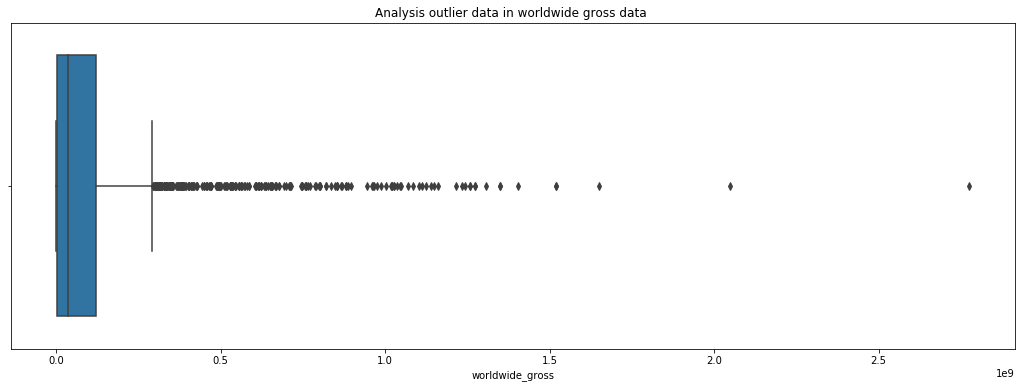

In [68]:
# to find outlier data on merge_data dataframe
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
sns.boxplot('worldwide_gross', data = merge_data)
plt.title("Analysis outlier data in worldwide gross data ")

Text(0.5, 1.0, 'Analysis outlier data in worldwide gross data ')

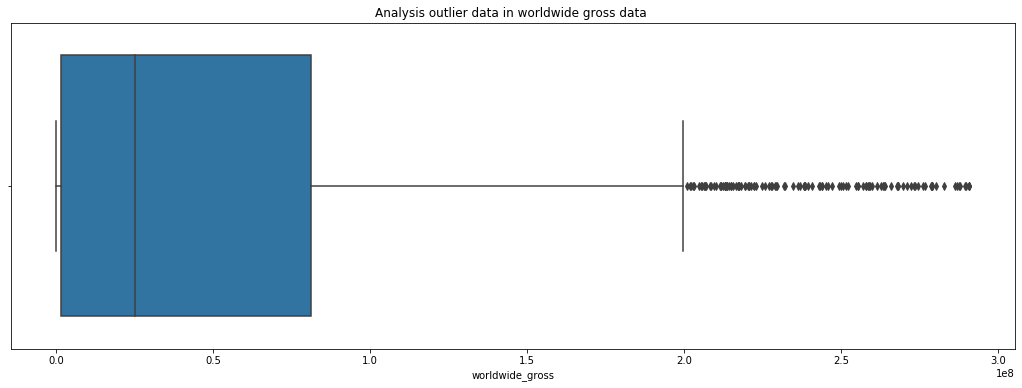

In [70]:
# to find outlier data on merge_data dataframe
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
sns.boxplot('worldwide_gross', data = data_nooutlier)
plt.title("Analysis outlier data in worldwide gross data ")

## Visualization with Linear Regression Modeling

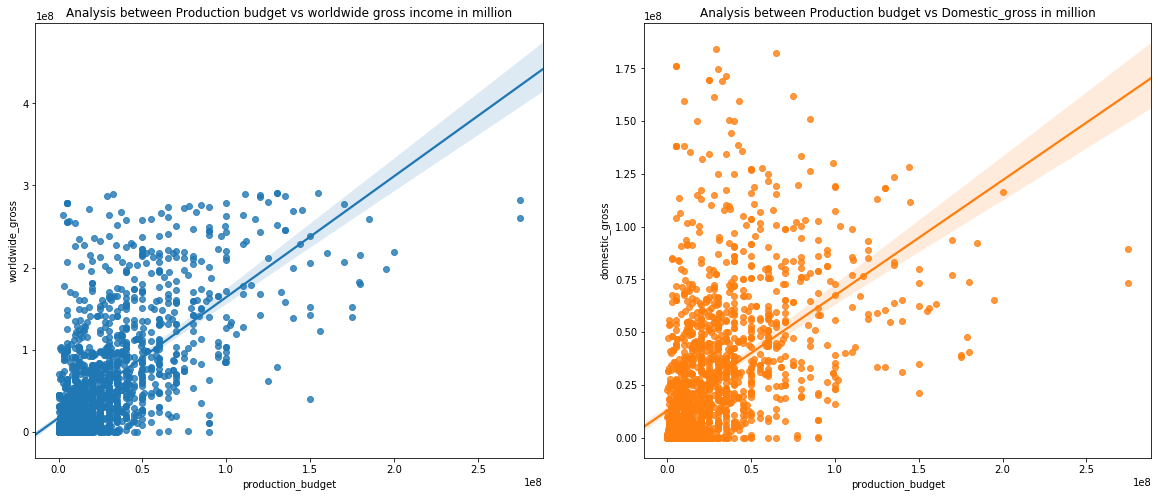

In [42]:
# create picture object 

fig =plt.figure(figsize=(20,8))
ax1= fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.title.set_text("Analysis between Production budget vs worldwide gross income in million")
ax2.title.set_text("Analysis between Production budget vs Domestic_gross in million")


#Remove outlier from worldwide column data
data_nooutlier=fg.remove_outlier(merge_data,'worldwide_gross')

#plot regression plot between production_budget and worldwide_gross
sns.regplot(x='production_budget',y='worldwide_gross',data=data_nooutlier,ax=ax1)

#plot regression plot between production_budget and domestic_gross
sns.regplot(x='production_budget',y='domestic_gross',data=data_nooutlier,ax=ax2)



Text(0.5, 1.0, 'Analysis between Production budget vs worldwide gross income with popularity')

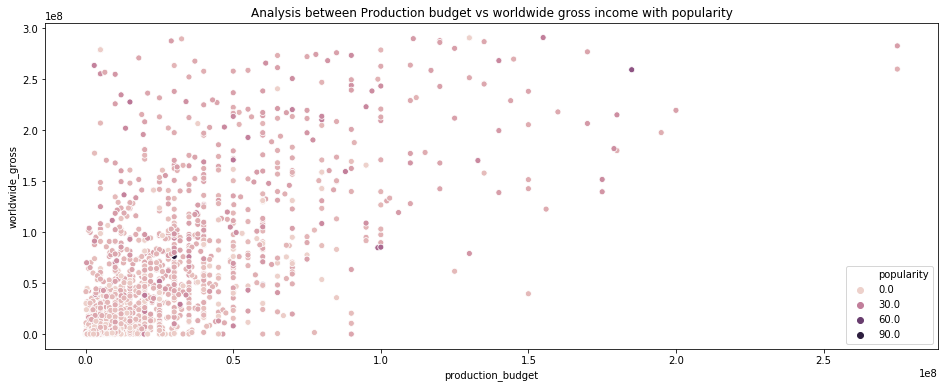

In [65]:
#plot scatterplot plot between production_budget and worldwide_gross and popularity
fig,ax = plt.subplots()
fig.set_size_inches(16,6)
sns.scatterplot(x='production_budget',y='worldwide_gross',hue='popularity',data=data_nooutlier,ax=ax)
plt.title("Analysis between Production budget vs worldwide gross income with popularity")

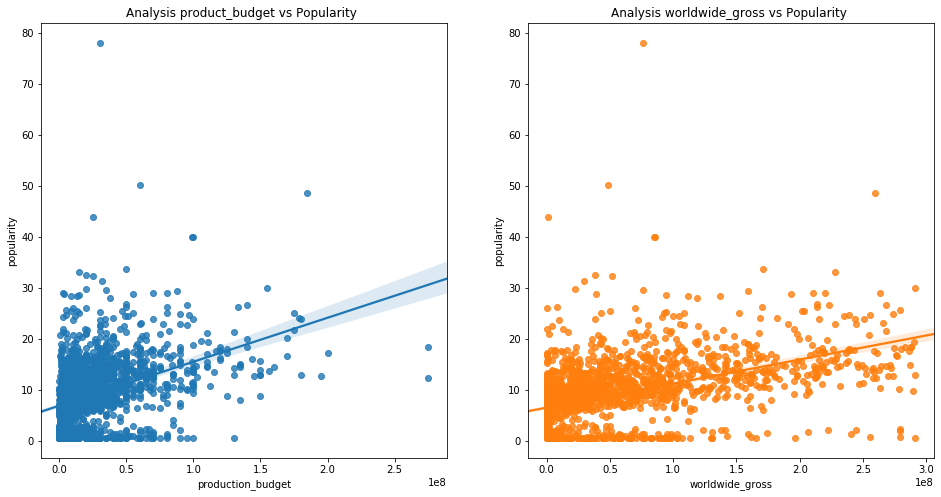

In [44]:
# create two subplot for analysis
fig = plt.figure(figsize=(16,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.title.set_text("Analysis product_budget vs Popularity ")
ax2.title.set_text("Analysis worldwide_gross vs Popularity ")


#ax1.set_xlabel('product_budget in million')
#ax1.set_ylabel('product_budget in rating point')

data_nooutlier=fg.remove_outlier(merge_data,'worldwide_gross')

#plot regression plot between production_budget and Popularity
sns.regplot(x='production_budget',y='popularity',data=data_nooutlier,ax=ax1)

#plot regression plot between production_budget and Popularity
sns.regplot(x='worldwide_gross',y='popularity',data=data_nooutlier,ax=ax2)




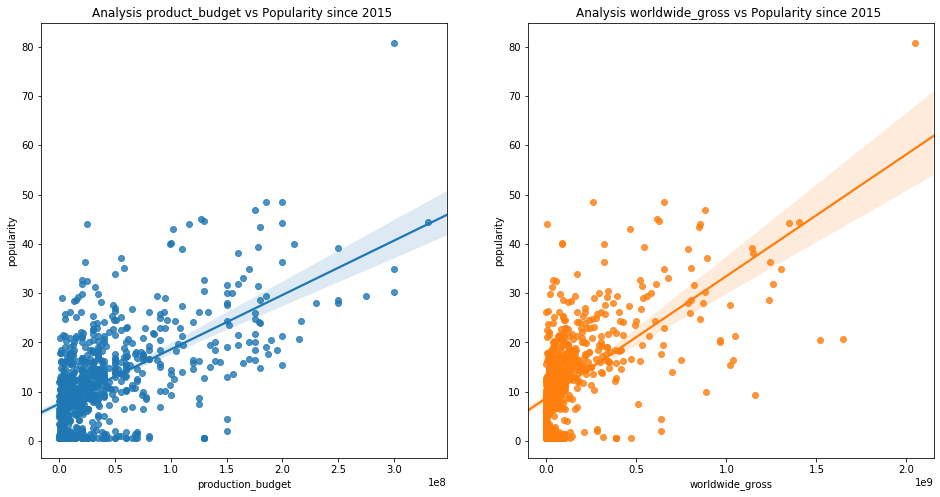

In [55]:
#create subset from merge_data for analysis movies popularity since 2015
data_subsetofmergerdata = merge_data[merge_data['release_date_x'] >='2015-01-01']

# create two subplot for analysis
fig = plt.figure(figsize=(16,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.title.set_text("Analysis product_budget vs Popularity since 2015 ")
ax2.title.set_text("Analysis worldwide_gross vs Popularity since 2015 ")

#reg plot between production_budget and popularity
sns.regplot(x='production_budget' , y ='popularity' ,data = data_subsetofmergerdata,ax=ax1 )

#reg plot between worldwide_gross and popularity
sns.regplot(x='worldwide_gross' , y ='popularity' ,data = data_subsetofmergerdata ,ax=ax2)

## Another Analysis Gross income vs original language

Text(0.5, 1.0, 'Analysis worldwide gross income vs individual movie and language ')

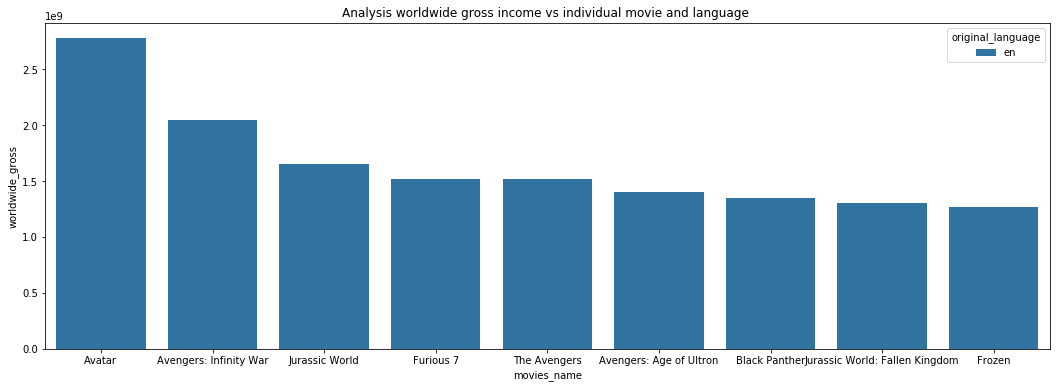

In [72]:
#create subset of 10 rows of merge_data
topten_movie_data=merge_data.sort_values('worldwide_gross',ascending=False).head(10)
topten_movie_data

#display barplot top 10 movies with worldwide gross
fig,ax =plt.subplots()
fig.set_size_inches(18,6)

sns.barplot(x='movies_name',y='worldwide_gross',hue='original_language',data=topten_movie_data,ax=ax)
plt.title("Analysis worldwide gross income vs individual movie and language ")

Text(0.5, 1.0, 'Analysis language vs worldwide_gross without outlier worldwide data')

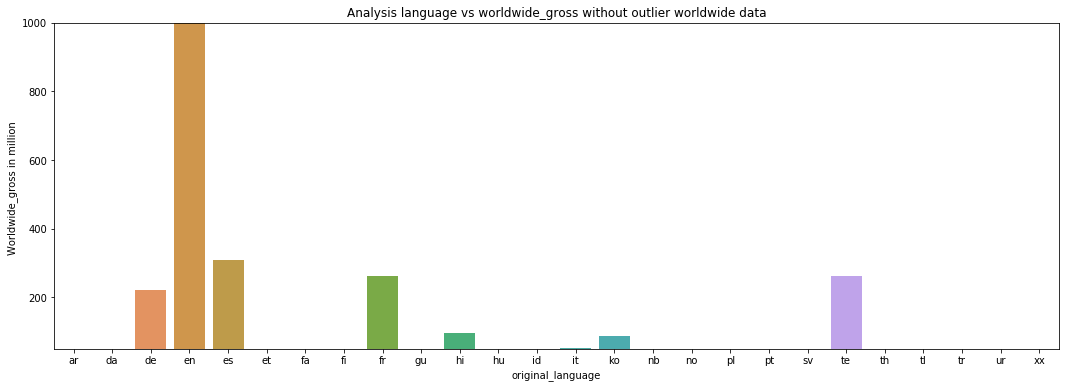

In [71]:
data_groupbylan_nooutlier=data_nooutlier.groupby('original_language').sum()
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
ax=sns.barplot(x=data_groupbylan_nooutlier.index,y= data_groupbylan_nooutlier['worldwide_gross']//1000000
               ,data =data_groupbylan_nooutlier)
ax.set(ylabel="Worldwide_gross in million ")
ax.set(ylim=(50,1000))
plt.title("Analysis language vs worldwide_gross without outlier worldwide data")